# Categorical Encoding

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import gdown
file_id = '13UnHdJCk7N0fkYH5JV5gsIIkfxgKF_b4'
output = 'loan_status.csv'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=13UnHdJCk7N0fkYH5JV5gsIIkfxgKF_b4
To: /content/loan_status.csv
100%|██████████| 4.63M/4.63M [00:00<00:00, 29.7MB/s]


'loan_status.csv'

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv(
    Path("loan_status.csv")
)

# Review the DataFrame
df.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully_Paid,99999999,Short_Term,741.0,2231892.0,8_years,Own_Home,Debt_Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
1,Fully_Paid,217646,Short_Term,730.0,1184194.0,<_1_year,Home_Mortgage,Debt_Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
2,Fully_Paid,548746,Short_Term,678.0,2559110.0,2_years,Rent,Debt_Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
3,Fully_Paid,99999999,Short_Term,728.0,714628.0,3_years,Rent,Debt_Consolidation,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0
4,Fully_Paid,99999999,Short_Term,740.0,776188.0,<_1_year,Own_Home,Debt_Consolidation,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0


<Axes: xlabel='Home_Ownership'>

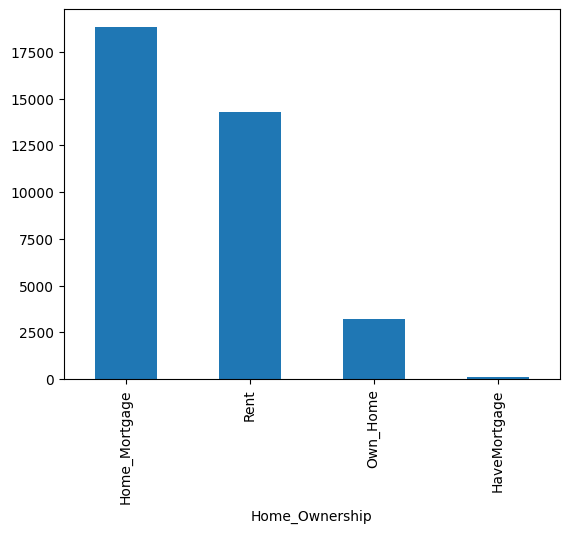

In [7]:
df['Home_Ownership'].value_counts().plot.bar()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_Status                   36423 non-null  object 
 1   Current_Loan_Amount           36423 non-null  int64  
 2   Term                          36423 non-null  object 
 3   Credit_Score                  36423 non-null  float64
 4   Annual_Income                 36423 non-null  float64
 5   Years_in_current_job          36423 non-null  object 
 6   Home_Ownership                36423 non-null  object 
 7   Purpose                       36423 non-null  object 
 8   Monthly_Debt                  36423 non-null  float64
 9   Years_of_Credit_History       36423 non-null  float64
 10  Months_since_last_delinquent  36423 non-null  float64
 11  Number_of_Open_Accounts       36423 non-null  int64  
 12  Number_of_Credit_Problems     36423 non-null  int64  
 13  C

In [8]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)

In [9]:
list(df.dtypes[df.dtypes == "object"].index)

['Loan_Status', 'Term', 'Years_in_current_job', 'Home_Ownership', 'Purpose']

In [10]:
# Create a list of the columns with categorical variables
categorical_variables = ["Loan_Status", "Term", "Years_in_current_job", "Home_Ownership", "Purpose"]

# Use the fit_transform method from the OneHotEncoder to encode the data
encoded_data = enc.fit_transform(df[categorical_variables])

In [11]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names_out(categorical_variables)
)

# Display sample data
encoded_df.head()

,Loan_Status_Fully_Paid,Loan_Status_Not_Paid,Term_Long_Term,Term_Short_Term,Years_in_current_job_10+_years,Years_in_current_job_1_year,Years_in_current_job_2_years,Years_in_current_job_3_years,Years_in_current_job_4_years,Years_in_current_job_5_years,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
